<a href="https://colab.research.google.com/github/maronga/Factors-Affecting-Housing-Prices-Analysis/blob/main/Factors_affecting_housing_prices_analysis_IP_Week_7_by_John_Maronga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Independent Project - Week 7


## 1. Defining the Question

### a) Specifying the Question

To study the factors that affect housing prices and creating a model that would allow the company to accurately predict the sale prices.



### b) Defining the Metric for Success

Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


### c) Understanding the context 

This project is being done on behalf of Hass Consulting Company, a real estate leader with over 25 years of experience. We have been tasked with studying the factors that affect housing; and creating a model that would allow the company to accurately prediact the sale prices.

### d) Recording the Experimental Design

In this study, I'll be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. 

For regression analysis, I'll implement the following regression techniques and compare their performances.

>1.   Multiple Linear Regression
2.   Quantile Regression
3.   Ridge Regression
4.   Lasso Regression
5.   Elastic Net Regression












### f) Importing relevant libraries



In [ ]:
#Importing Libraries 
#

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy as sp

import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## 2. Reading the Data

In [ ]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset
housing_df = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
housing_df.shape

(21613, 20)

In [ ]:
# Previewing the top of our dataset
#
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
# 
housing_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking whether each column has an appropriate datatype
#
housing_df.dtypes

#All columns have the right data types

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

To continue with cleaning the dataset and further move to feature engineering, it is important for us to gauge which variables will be necessary for our analysis and also classify which variables will be used as **features** and which will be the **target**.

---



**Target**: since I'm creating a model that would allow the company to accurately predict the sale of prices, *price* will be our target variable.

---



**Features**: the following will be the features used in the model to predict the results; bedrooms,	bathrooms,	sqft_living, sqft_lot,	floors,	waterfront,	view,	condition	, grade,	sqft_above,	sqft_basement,	yr_built,	yr_renovated,	zipcode, sqft_living15,	sqft_lot15.

## 5. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#

housing_df.isnull().sum()

# There are no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Checking for duplicates
#
housing_df.duplicated().sum()

3

The dataset has 3 duplictes

In [ ]:
# Removing duplicates

housing_df.drop_duplicates(inplace=True)

In [ ]:
# Checking for columns where all values are zero
zero_cols = [ col for col, is_zero in ((housing_df == 0).sum() == housing_df.shape[0]).items() if is_zero ]

zero_cols

['waterfront', 'view', 'yr_renovated']

In [ ]:
# Dropping irrelevant columns
housing_df.drop(columns=['id', 'lat', 'long', 'waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

In [ ]:
# Checking for Outliers
#

Q1 = housing_df.quantile(0.25)
Q3 = housing_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)



price            323387.50
bedrooms              1.00
bathrooms             0.75
sqft_living        1124.50
sqft_lot           5648.75
floors                1.00
condition             1.00
grade                 1.00
sqft_above         1020.00
sqft_basement       560.00
yr_built             46.00
zipcode              85.00
sqft_living15       870.00
sqft_lot15         4983.00
dtype: float64


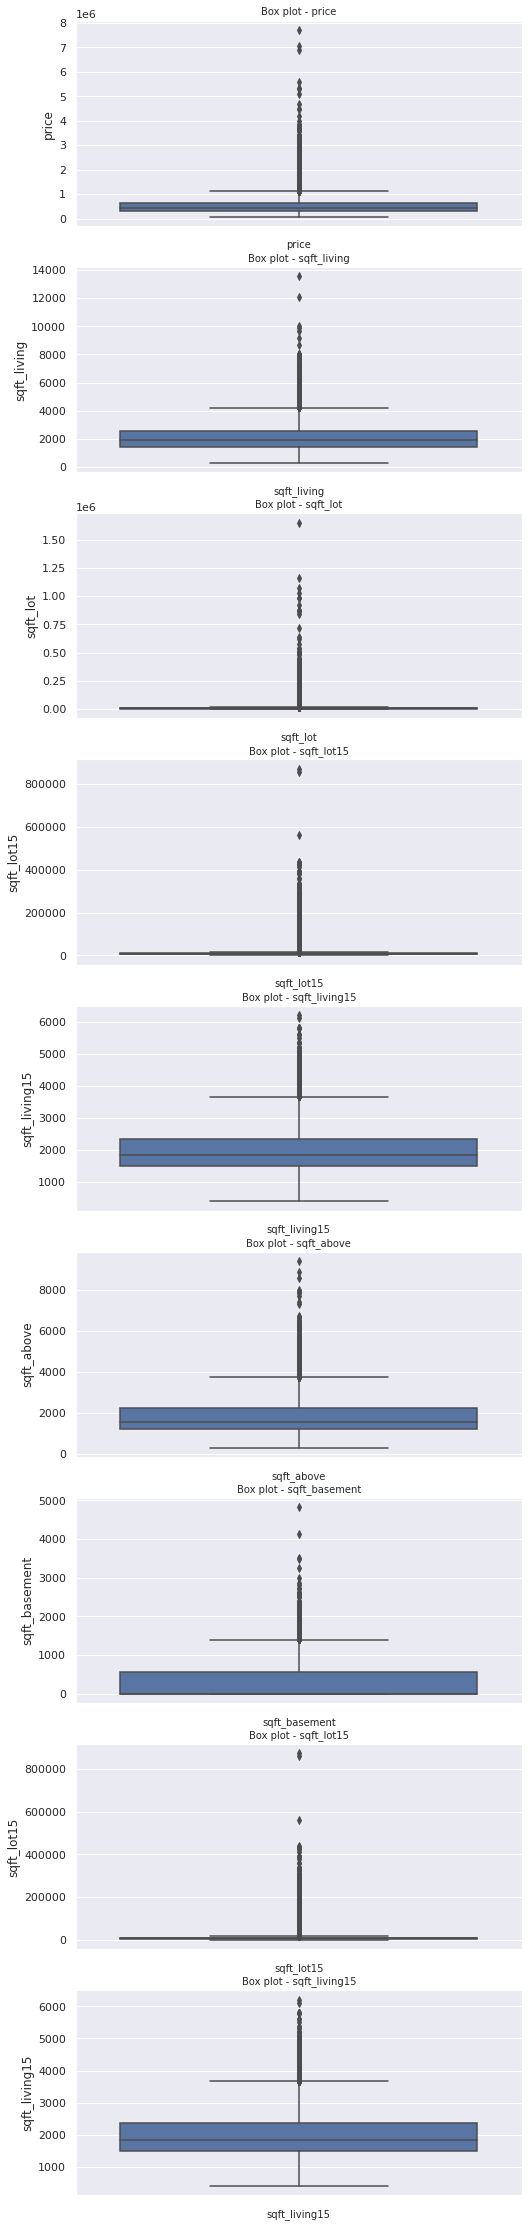

In [ ]:
#Plotting the box plot for columns with outliers

col_names = ['price','sqft_living','sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=housing_df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [ ]:
# Removing outliers
housing_df = housing_df[~((housing_df < (Q1 - 1.5 * IQR)) |(housing_df > (Q3 + 1.5 * IQR))).any(axis=1)]
housing_df.shape

(16612, 14)

In [ ]:
# More data cleaning procedures
#
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16612 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16612 non-null  float64
 1   bedrooms       16612 non-null  int64  
 2   bathrooms      16612 non-null  float64
 3   sqft_living    16612 non-null  int64  
 4   sqft_lot       16612 non-null  int64  
 5   floors         16612 non-null  float64
 6   condition      16612 non-null  int64  
 7   grade          16612 non-null  int64  
 8   sqft_above     16612 non-null  int64  
 9   sqft_basement  16612 non-null  int64  
 10  yr_built       16612 non-null  int64  
 11  zipcode        16612 non-null  int64  
 12  sqft_living15  16612 non-null  int64  
 13  sqft_lot15     16612 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.9 MB


## 6. Exploratory Analysis

### a) Univariate Analysis

In [ ]:
# Ploting the univariate summaries and recording our observations
#
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.661200e+04,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000,16612.000000
mean,4.524053e+05,3.269083,1.984574,1838.827354,7054.684987,1.466079,3.417108,7.401637,1590.670178,248.157176,1969.976764,98081.933843,1815.761558,6932.756381
std,1.895564e+05,0.775242,0.649025,623.932141,3384.975688,0.544185,0.644826,0.811774,599.165058,366.895185,29.705813,54.046737,514.988225,3015.852296
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,620.000000,651.000000
25%,3.055000e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,3.000000,7.000000,1150.000000,0.000000,1950.000000,98033.000000,1440.000000,4820.000000
50%,4.190000e+05,3.000000,2.000000,1770.000000,7029.500000,1.000000,3.000000,7.000000,1440.000000,0.000000,1971.000000,98074.000000,1720.000000,7169.000000
75%,5.641125e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,4.000000,8.000000,1920.000000,500.000000,1997.000000,98119.000000,2130.000000,8744.000000
max,1.130000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,5.000000,9.000000,3740.000000,1400.000000,2015.000000,98199.000000,3640.000000,17550.000000


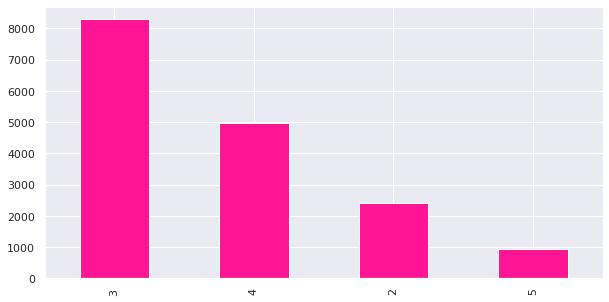

In [ ]:
# Ploting the univariate summaries and recording our observations
#
plt.figure(figsize = (10,5))
housing_df['bedrooms'].value_counts().plot(kind = 'bar', color = 'deeppink')

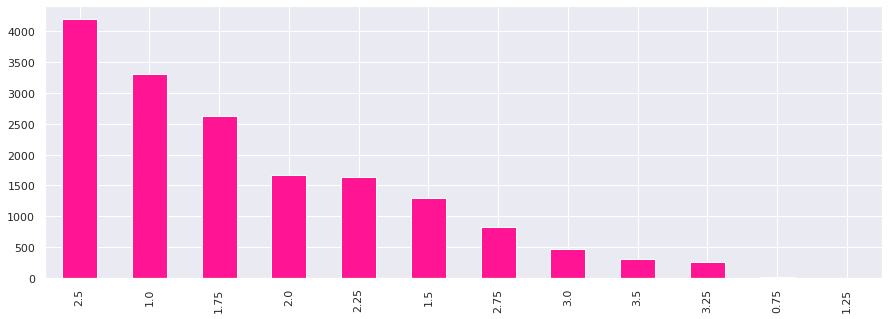

In [ ]:
plt.figure(figsize = (15,5))
housing_df['bathrooms'].value_counts().plot(kind = 'bar', color = 'deeppink')

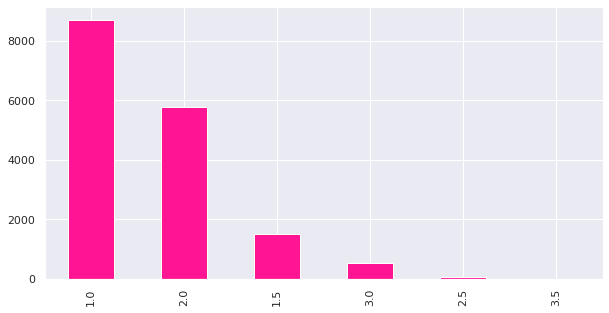

In [ ]:
plt.figure(figsize = (10,5))
housing_df['floors'].value_counts().plot(kind = 'bar', color = 'deeppink')

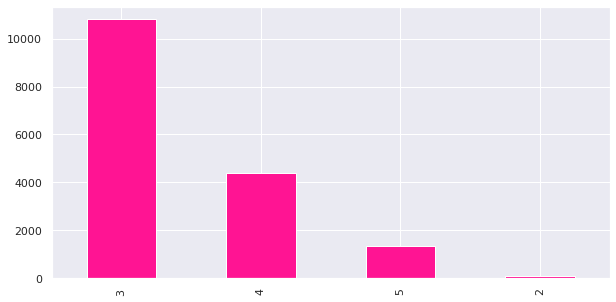

In [ ]:
plt.figure(figsize = (10,5))
housing_df['condition'].value_counts().plot(kind = 'bar', color = 'deeppink')


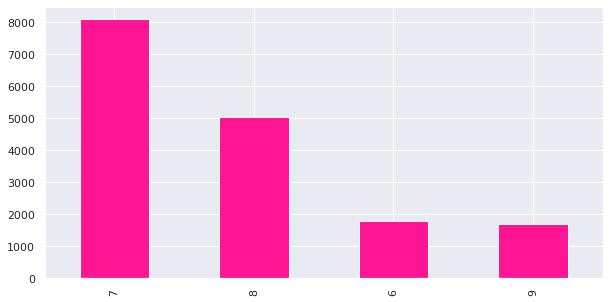

In [ ]:
plt.figure(figsize = (10,5))
housing_df['grade'].value_counts().plot(kind = 'bar', color = 'deeppink')

## Observations
> 1. Most of the houses owned by the Hass Consultig company are three bedroomed.
> 2. Most of the houses owned by the company have 2.5 bathrooms.
> 3. Most of the houses have one floor.
> 4. Most of their houses are grade 7.


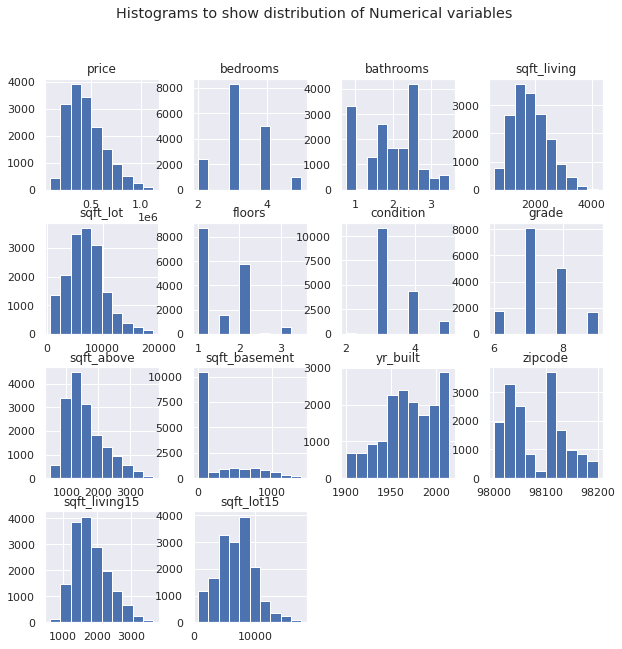

In [ ]:
##Checking for data distribution
housing_df.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

### b) Bivariate Analysis

In [ ]:
#Correlation matrix.

matrix = housing_df.corr()
matrix


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.240482,0.351898,0.525741,-0.076376,0.219632,0.080447,0.535590,0.399446,0.241738,-0.056643,0.031208,0.459757,-0.084993
bedrooms,0.240482,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.351898,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.525741,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,-0.076376,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.219632,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.080447,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.535590,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.399446,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.241738,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950


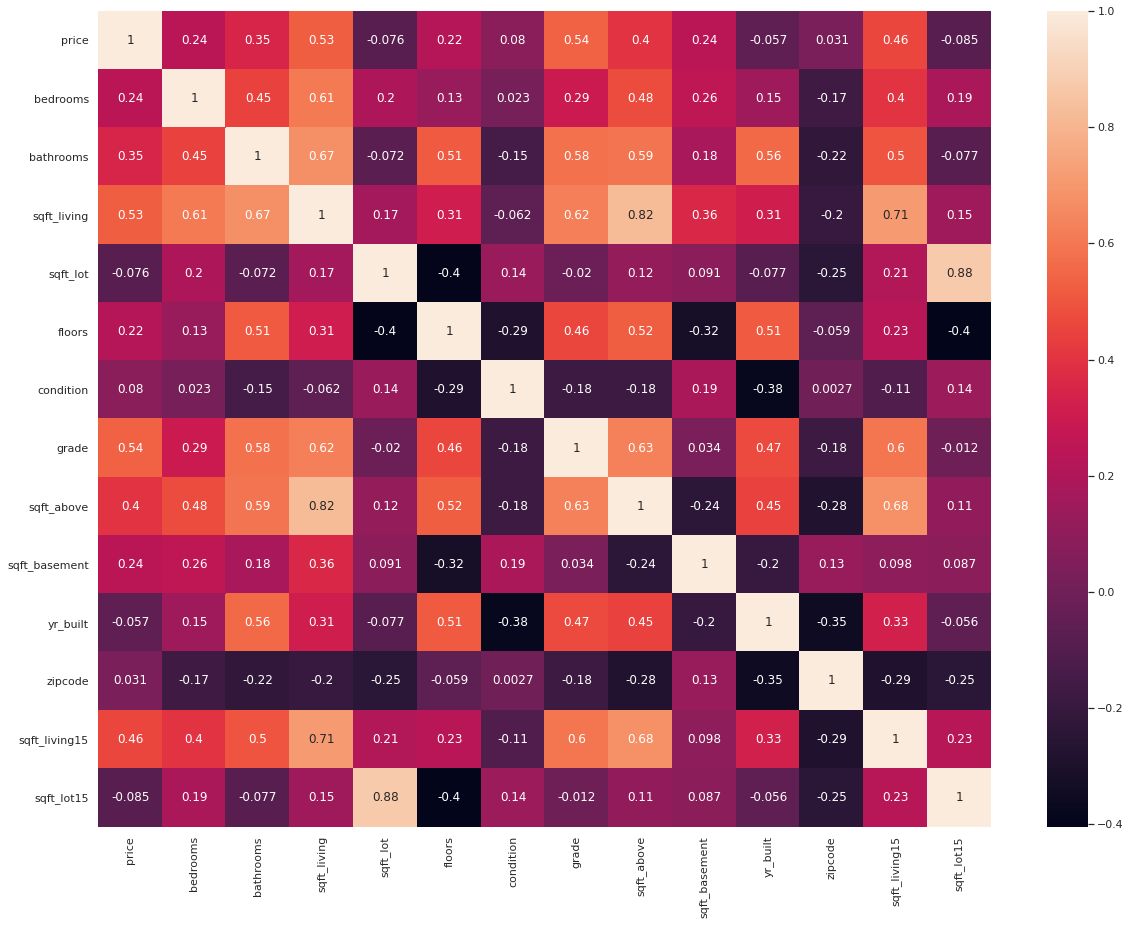

In [ ]:
#Plottting a heatmap to show correlation of different numerical variables
sns.heatmap(housing_df.corr(), xticklabels = housing_df.corr().columns, yticklabels = housing_df.corr().columns, annot=True)

## Observations
Using a threshold of 0.5, we observe that:

>1. The price has a high Correlation with the following columns: square foot living, grade with the correlation above 0.5
>2. The grade has a high correlation with the number of bathrooms and bedrooms and the Square feet area of living area
>3. The number of floors and the number of bathrooms are highly correlated
>4. The number of bathrooms, the grade and the Square feet area of living area



## Detecting Multicollinearity

In [ ]:
# Checking for multicollinearity on the independent variables only

F = housing_df.drop('price', 1)
correlations = F.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.451397,0.608794,0.197087,0.131016,0.023426,0.293360,0.477339,0.255771,0.151101,-0.170408,0.399656,0.185039
bathrooms,0.451397,1.000000,0.673522,-0.071624,0.513234,-0.148754,0.580506,0.590502,0.181044,0.556519,-0.220397,0.499009,-0.076634
sqft_living,0.608794,0.673522,1.000000,0.170916,0.313246,-0.062333,0.624929,0.820780,0.360183,0.314758,-0.196734,0.710310,0.153119
sqft_lot,0.197087,-0.071624,0.170916,1.000000,-0.398300,0.137912,-0.019901,0.122005,0.091413,-0.076768,-0.246742,0.211233,0.877589
floors,0.131016,0.513234,0.313246,-0.398300,1.000000,-0.286326,0.459502,0.523008,-0.321410,0.513873,-0.059118,0.233917,-0.404227
condition,0.023426,-0.148754,-0.062333,0.137912,-0.286326,1.000000,-0.179981,-0.182266,0.191651,-0.377120,0.002678,-0.112499,0.140645
grade,0.293360,0.580506,0.624929,-0.019901,0.459502,-0.179981,1.000000,0.630046,0.033829,0.470836,-0.183223,0.598915,-0.011633
sqft_above,0.477339,0.590502,0.820780,0.122005,0.523008,-0.182266,0.630046,1.000000,-0.237272,0.449356,-0.283333,0.679684,0.106205
sqft_basement,0.255771,0.181044,0.360183,0.091413,-0.321410,0.191651,0.033829,-0.237272,1.000000,-0.198561,0.128141,0.097965,0.086950
yr_built,0.151101,0.556519,0.314758,-0.076768,0.513873,-0.377120,0.470836,0.449356,-0.198561,1.000000,-0.351713,0.329910,-0.055767


## Computing the Variance Inflation Factor(VIF)
> We create a new dataframe with the INVERSE of the correlations above.

In [ ]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.687836,-0.322455,-1.461746e+00,-0.067188,0.013406,-0.034370,0.217844,4.272828e-01,2.814541e-01,0.109964,0.078029,0.094230,-0.107062
bathrooms,-0.322455,2.861101,-5.347391e-01,0.053501,-0.692755,-0.131244,-0.227338,-3.581280e-01,-7.187090e-01,-0.883535,0.103587,-0.055131,0.137129
sqft_living,-1.460930,-0.531025,6.673875e+13,-0.698027,1.224825,-0.609119,-1.485977,-6.408955e+13,-3.924486e+13,0.126402,-0.205201,-1.156769,1.080596
sqft_lot,-0.067188,0.053501,-6.896162e-01,4.555009,0.440017,0.020231,0.090251,9.698508e-02,3.053274e-01,0.109546,0.175950,0.148985,-3.720152
floors,0.013406,-0.692755,1.234698e+00,0.440017,2.650666,0.077957,-0.316545,-1.947947e+00,-1.055790e-01,-0.419044,-0.187321,0.254424,0.514677
condition,-0.034370,-0.131244,-6.120603e-01,0.020231,0.077957,1.237384,-0.001715,6.067211e-01,2.602279e-01,0.496791,0.165728,0.102844,-0.112170
grade,0.217844,-0.227338,-1.481462e+00,0.090251,-0.316545,-0.001715,2.205778,6.665618e-01,4.931787e-01,-0.341202,-0.066191,-0.588175,-0.025836
sqft_above,0.426964,-0.345240,-6.408955e+13,0.102234,-1.945606,0.604307,0.669118,6.154550e+13,3.768703e+13,0.128246,0.196615,-0.370211,-0.953923
sqft_basement,0.275770,-0.716098,-3.924486e+13,0.309359,-0.102191,0.258535,0.495744,3.768703e+13,2.307743e+13,0.274163,-0.124897,0.150236,-0.504745
yr_built,0.109964,-0.883535,1.112716e-01,0.109546,-0.419044,0.496791,-0.341202,1.427756e-01,2.830602e-01,2.158491,0.490466,0.012752,-0.244983


> From this we observe that sqft_living, sqft_above have a VIF factor above 5. So, I'll remove the sqft_living and sqft_above features and see how they affect our accuracy, compared to accuracy when we leave them in.


In [ ]:
# This is the version that excludes the 2 variables

# Subsetting the data
X = housing_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing_df['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
from sklearn.metrics import r2_score
from sklearn import metrics

y_pred = regressor.predict(X_test)

print("For the model excluding both sqft_living and sqft_above:")
print("         The R2 score is:", r2_score(y_test, y_pred))
print('         Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


For the model excluding both sqft_living and sqft_above:
         The R2 score is: 0.5151109915656631
         Root Mean Squared Error: 132393.44764778885


The predicted values are a bit off. The 2 features that the VIF function recommended for dropping are the key indicators for square footage, so we cannot possibly make predictions without them. This proves that. 

Let's try it with just the _sqft_above_ feature, which has a lower correlation index compared to _sqft_living_. Modifications are made by adding and subtracting features from X and y above.

In [ ]:
# This is the version that includes sqft_above ONLY

# Subsetting the data
X = housing_df[['bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing_df['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_living only:")
print("        The R2 score is:", r2_score(y_test, y_pred))
print('        Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_living only:
        The R2 score is: 0.5241707950185682
        Root Mean Squared Error: 131150.77735592556


In [ ]:
# This is the version that includes sqft_living ONLY

# Subsetting the data
X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing_df['price']

y_pred = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred = regressor.predict(X_test)

print("For the model excluding sqft_above only:")
print("          The R2 score is:", r2_score(y_test, y_pred))
print('          Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model excluding sqft_above only:
          The R2 score is: 0.5241707950185677
          Root Mean Squared Error: 131150.77735592565


In [ ]:
# This is the version that includes both sqft_above and sqft_living 

# Subsetting the data
X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']]
y = housing_df['price']

y_pred_all = regressor.predict(X_test)

# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_all, y_train_all)

# coefficients for our test set attributes. 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Making Predictions
# 
y_pred_all = regressor.predict(X_test_all)

print("For the model including both sqft_living and sqft_above:")
print("           The R2 score is:", r2_score(y_test, y_pred))
print('           Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

For the model including both sqft_living and sqft_above:
           The R2 score is: 0.5241707950185677
           Root Mean Squared Error: 131150.77735592565


The difference between the R2 scores for the models including or excluding one of the variables have a very small marginal difference. This shows that the 2 variables being multicollinear does not affect the linear model. Thus I'll choose the square foot of the  living area to continue with the analysis henceforth. 


## Residual Plots and Heteroscedasticity Test

In [ ]:
# Splitting our data into training and test sets

X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Fitting our training data in our model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# This is our prediction for price based on our model
y_predict = a = regressor.predict(X_test)

# We create the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

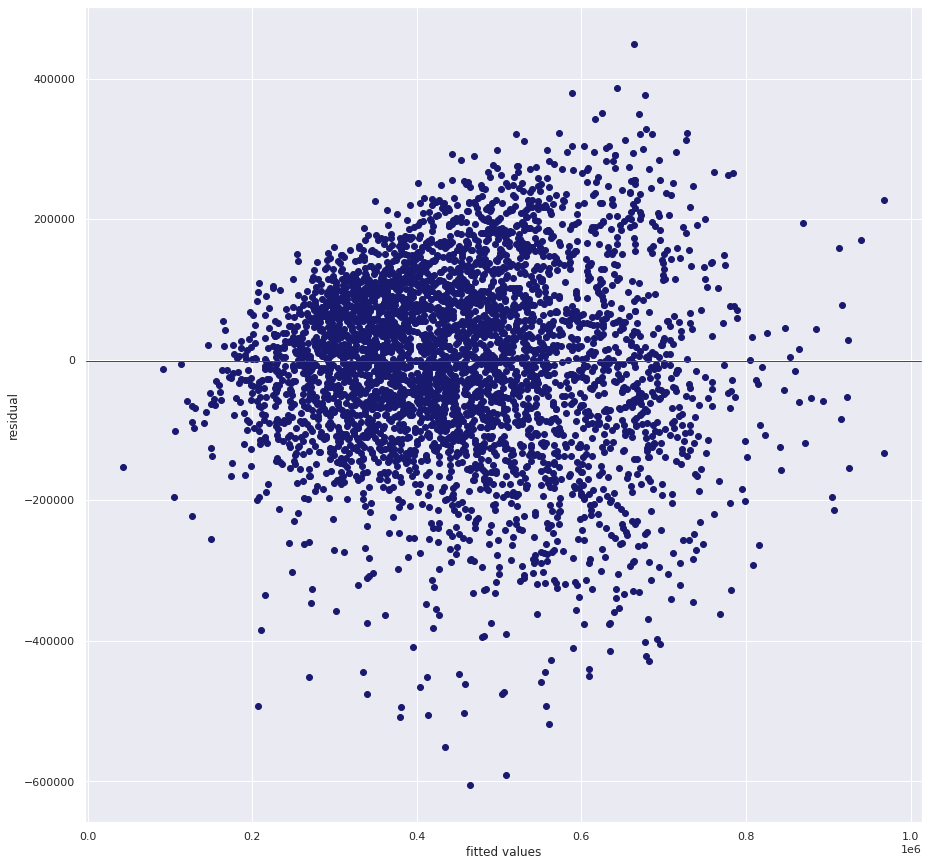

In [ ]:
## Building the residual plot

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
plt.scatter(y_predict, residuals, color='midnightblue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()


The residuals are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average. 

## Barlett's Test of Heteroscedasticity

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# We compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print("The critical value is:", critical_value)

# If the test_result is greater than the critical value, then
# this would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed.')
else:
  print('The variances are homogeneous.')

The critical value is: 4434.1150227222215
The variances are homogeneous.


In [ ]:
# This is our prediction for price based on our model
y_predict = regressor.predict(X_test)

# The R2 score and RMSE for the linear model is 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

from sklearn.metrics import r2_score

linear_R2 = a = r2_score(y_test, y_predict)
print("The R2 score for the linear model is:", linear_R2)

Root Mean Squared Error: 130705.56995099802
The R2 score for the linear model is: 0.5236251614318701


## 7. Building various regression models

# Quantile Regression

In [ ]:
# Splitting our data into training and test sets

X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', housing_df)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3258
Model:                       QuantReg   Bandwidth:                   2.328e+04
Method:                 Least Squares   Sparsity:                    3.136e+05
Date:                Sat, 21 Nov 2020   No. Observations:                16612
Time:                        21:44:28   Df Residuals:                    16600
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.975e+06   1.11e+05     44.672      0.000    4.76e+06    5.19e+06
X[0]       -1.664e+04   2035.915     -8.173      0.000   -2.06e+04   -1.26e+04
X[1]        1.761e+04   3166.017      5.564      0.000    1.14e+04    2.38e+04
X[2]          68.4750      4.132     16.572      0.0

In [ ]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 130629.25574820522
The R2 score for the elastic model is: 0.525069426145689


# Ridge Regression

In [ ]:
# Splitting our data into training and test sets

X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Splitting the dataset into training and testing sets
#
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# determining the most appropriate value for the l2 regularization.
 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.001}

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)


Ridge model Root Mean Squared Error: 130700.91945696305
The R2 score for the ridge model is: 0.5236590595883833


# Lasso Regression

In [ ]:
# Splitting our data into training and test sets

X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [ ]:
# Fitting models and getting RMSE

gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
d = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",d)

The RMSE for the lasso model: 130705.91921936342
The R2 score for the lasso model is: 0.5236226155130764


# Elastic Net Regression

In [ ]:
# Splitting our data into training and test sets

X = housing_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = housing_df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Normalizing the data and creating our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the elastic model is:", e)

The RMSE for the Elastic model: 130658.71113640377
The R2 score for the elastic model is: 0.5239666672894863


In [ ]:
# Reviewing the Solution 
# Models vs r2 score.
models = ['multi-linear', 'quantile', 'ridge', 'lasso', 'elastic']
r2_scores = [a,b,c,d,e]
model_results = pd.DataFrame({'Regresion models': models, 'r2_scores': r2_scores})
print(model_results)
print("**************")
print("The mean r2 scores is:", model_results.mean())
#model_results.sort_values(by = 'r2_scores',axis=0,ascending=False)

  Regresion models  r2_scores
0     multi-linear   0.523625
1         quantile   0.525069
2            ridge   0.523659
3            lasso   0.523623
4          elastic   0.523967
**************
The mean r2 scores is: r2_scores    0.523989
dtype: float64


# Conclusion

After a thorough and exhaustive analysis using the 5 regression models above, we see that the difference between the different regression models accuracy scores using r2 scores metric is quite small and there is no clear cut difference to distinguish one from the other in terms of perfomance.


---
An average accuracy of 52.399% is not really satisfactory. Thus, further analysis of data needs be done to further improve the model.

## 8. Challenging the solution

> Our average r2_scores = 0.523989. This translates to 52.399% accuracy which is not the best that we can have to come up with a solid marketing and pricing for our client. 

---


We need to consider other models to get a higher accuracy that will be more informative and have stronger evidence to present to the client.




## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data? YES

### b). Do we need other data to answer our question? NO

### c). Did we have the right question? YES